### Setup

In this tutorial we will show how to use Optim.jl to find the maxima and minima of solutions. Let's take a look at the double pendulum:
# Finding Maxima and Minima of DiffEq Solutions
### Chris Rackauckas

In [1]:
#Constants and setup
using OrdinaryDiffEq
initial = [0.01, 0.01, 0.01, 0.01]
tspan = (0.,100.)

#Define the problem
function double_pendulum_hamiltonian(udot,u,p,t)
    α  = u[1]
    lα = u[2]
    β  = u[3]
    lβ = u[4]
    udot .=
    [2(lα-(1+cos(β))lβ)/(3-cos(2β)),
    -2sin(α) - sin(α+β),
    2(-(1+cos(β))lα + (3+2cos(β))lβ)/(3-cos(2β)),
    -sin(α+β) - 2sin(β)*(((lα-lβ)lβ)/(3-cos(2β))) + 2sin(2β)*((lα^2 - 2(1+cos(β))lα*lβ + (3+2cos(β))lβ^2)/(3-cos(2β))^2)]
end

#Pass to solvers
poincare = ODEProblem(double_pendulum_hamiltonian, initial, tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.01, 0.01, 0.01, 0.01]

In [2]:
sol = solve(poincare, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 193-element Array{Float64,1}:
   0.0                
   0.08332584852065579
   0.24175280272193683
   0.438953650048967  
   0.679732254249109  
   0.9647633763375199 
   1.317944955684634  
   1.7031210236334697 
   2.067847793204029  
   2.4717825254408226 
   2.9074507998651633 
   3.433060498605828  
   3.8819683218035226 
   ⋮                  
  94.24236254712072   
  94.76892592006095   
  95.31884242222814   
  95.84571836675161   
  96.35777612654947   
  96.9291238553289    
  97.44678729813481   
  97.96247442963697   
  98.5118249699588    
  99.06081878698636   
  99.58283477685136   
 100.0                
u: 193-element Array{Array{Float64,1},1}:
 [0.01, 0.01, 0.01, 0.01]                          
 [0.00917069, 0.006669, 0.0124205, 0.00826641]     
 [0.00767328, 0.000374625, 0.0164426, 0.00463683]  
 [0.00612597, -0.00730546, 0.0199674, -0.000336506]
 [0.0049661, -0.0163086, 0.0214407, -0.00670

In time, the solution looks like:

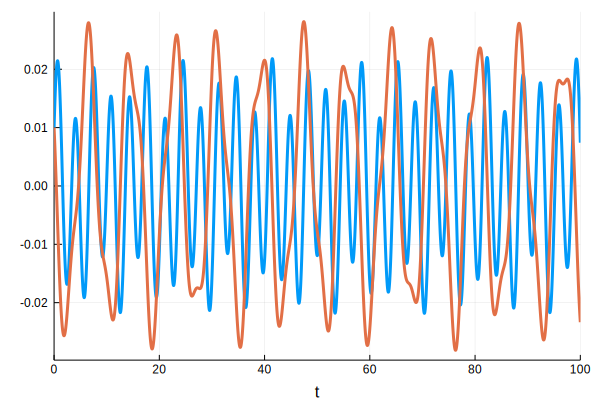

In [3]:
using Plots; gr()
plot(sol, vars=[(0,3),(0,4)], leg=false, plotdensity=10000)

while it has the well-known phase-space plot:

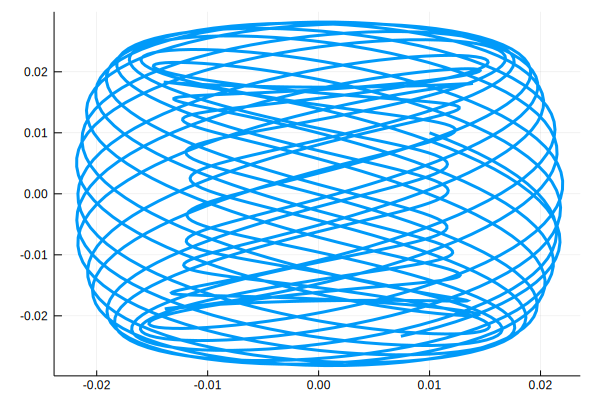

In [4]:
plot(sol, vars=(3,4), leg=false)

### Local Optimization

Let's fine out what some of the local maxima and minima are. Optim.jl can be used to minimize functions, and the solution type has a continuous interpolation which can be used. Let's look for the local optima for the 4th variable around `t=20`. Thus our optimization function is:

In [5]:
f = (t) -> sol(t,idxs=4)

#3 (generic function with 1 method)

`first(t)` is the same as `t[1]` which transforms the array of size 1 into a number. `idxs=4` is the same as `sol(first(t))[4]` but does the calculation without a temporary array and thus is faster. To find a local minima, we can simply call Optim on this function. Let's find a local minimum:

In [6]:
using Optim
opt = optimize(f,18.0,22.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [18.000000, 22.000000]
 * Minimizer: 1.863213e+01
 * Minimum: -2.793164e-02
 * Iterations: 11
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 12

From this printout we see that the minimum is at `t=18.63` and the value is `-2.79e-2`. We can get these in code-form via:

In [7]:
println(opt.minimizer)
println(opt.minimum)

18.632126799604933
-0.027931635264245896


To get the maximum, we just minimize the negative of the function:

In [8]:
f = (t) -> -sol(first(t),idxs=4)
opt2 = optimize(f,0.0,22.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 22.000000]
 * Minimizer: 1.399975e+01
 * Minimum: -2.269411e-02
 * Iterations: 13
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 14

Let's add the maxima and minima to the plots:

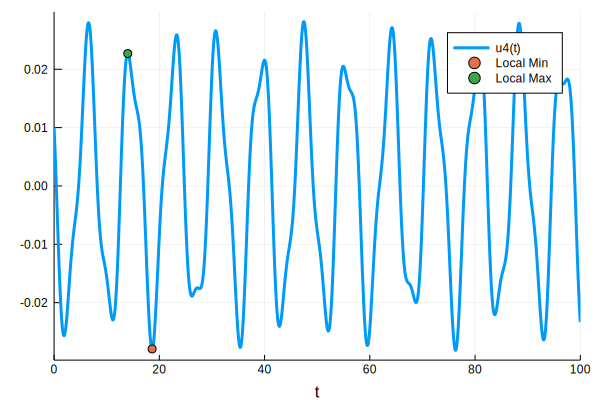

In [9]:
plot(sol, vars=(0,4), plotdensity=10000)
scatter!([opt.minimizer],[opt.minimum],label="Local Min")
scatter!([opt2.minimizer],[-opt2.minimum],label="Local Max")

Brent's method will locally minimize over the full interval. If we instead want a local maxima nearest to a point, we can use `BFGS()`. In this case, we need to optimize a vector `[t]`, and thus dereference it to a number using `first(t)`.

In [10]:
f = (t) -> -sol(first(t),idxs=4)
opt = optimize(f,[20.0],BFGS())

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [20.0]
 * Minimizer: [23.29760728871635]
 * Minimum: -2.588588e-02
 * Iterations: 4
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 1.11e-04 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = -6.49e-09 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 8.42e-12 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 16
 * Gradient Calls: 16

### Global Optimization

If we instead want to find global maxima and minima, we need to look somewhere else. For this there are many choices. A pure Julia option is BlackBoxOptim.jl, but I will use NLopt.jl. Following the NLopt.jl tutorial but replacing their function with out own:

In [12]:
import NLopt, ForwardDiff

count = 0 # keep track of # function evaluations

function g(t::Vector, grad::Vector)
  if length(grad) > 0
    #use ForwardDiff for the gradients
    grad[1] = ForwardDiff.derivative((t)->sol(first(t),idxs=4),t)
  end
  sol(first(t),idxs=4)
end
opt = NLopt.Opt(:GN_ORIG_DIRECT_L, 1)
NLopt.lower_bounds!(opt, [0.0])
NLopt.upper_bounds!(opt, [40.0])
NLopt.xtol_rel!(opt,1e-8)
NLopt.min_objective!(opt, g)
(minf,minx,ret) = NLopt.optimize(opt,[20.0])
println(minf," ",minx," ",ret)
NLopt.max_objective!(opt, g)
(maxf,maxx,ret) = NLopt.optimize(opt,[20.0])
println(maxf," ",maxx," ",ret)

┌ Info: Precompiling NLopt [76087f3c-5699-56af-9a33-bf431cd00edd]
└ @ Base loading.jl:1186


-0.027931635264245837 [18.6321] XTOL_REACHED
0.027968571933041954 [6.5537] XTOL_REACHED


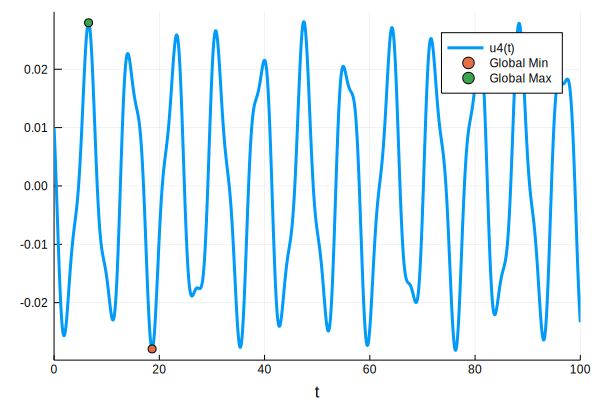

In [13]:
plot(sol, vars=(0,4), plotdensity=10000)
scatter!([minx],[minf],label="Global Min")
scatter!([maxx],[maxf],label="Global Max")